In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
#read
df = pd.read_csv("E-commerce Website Logs new.csv")
df.head()

C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,2017-03-14 17:43:57.172,2533,TCP,1.10.195.126,20100,Chrome,28,Female,CA,Normal,English,261.96,No,0,Credit Card
1,2017-03-14 17:43:57.172,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21,Male,AR,Normal,English,731.94,No,0,Debit Card
2,2017-03-14 17:43:26.135,1525,TCP,1.115.198.107,90100,Mozilla Firefox,20,Male,PL,Normal,English,14.62,No,0,Cash
3,2017-03-14 17:43:26.135,4572,TCP,1.121.152.143,100300,Mozilla Firefox,66,Female,IN,Normal,Spanish,9.575.775,No,0,Credit Card
4,2017-03-14 18:17:09.005,3652,TCP,1.123.135.213,270200,Mozilla Firefox,53,Female,KR,Normal,Spanish,22.368,No,0,Cash


In [3]:
#start prep
df.drop(['network_protocol', 'ip', 'bytes'], axis=1, inplace=True)
df.head()

,accessed_date,duration_(secs),accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,2017-03-14 17:43:57.172,2533,Chrome,28,Female,CA,Normal,English,261.96,No,0,Credit Card
1,2017-03-14 17:43:57.172,4034,Mozilla Firefox,21,Male,AR,Normal,English,731.94,No,0,Debit Card
2,2017-03-14 17:43:26.135,1525,Mozilla Firefox,20,Male,PL,Normal,English,14.62,No,0,Cash
3,2017-03-14 17:43:26.135,4572,Mozilla Firefox,66,Female,IN,Normal,Spanish,9.575.775,No,0,Credit Card
4,2017-03-14 18:17:09.005,3652,Mozilla Firefox,53,Female,KR,Normal,Spanish,22.368,No,0,Cash


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   accessed_date    172838 non-null  object
 1   duration_(secs)  172838 non-null  int64 
 2   accessed_Ffom    172838 non-null  object
 3   age              172838 non-null  object
 4   gender           172838 non-null  object
 5   country          172838 non-null  object
 6   membership       172838 non-null  object
 7   language         172838 non-null  object
 8   sales            172838 non-null  object
 9   returned         172838 non-null  object
 10  returned_amount  172838 non-null  object
 11  pay_method       172838 non-null  object
dtypes: int64(1), object(11)
memory usage: 15.8+ MB


In [5]:
df['age'].value_counts()

0     41766
0     31615
--    14743
37     1771
22     1747
43     1712
51     1708
64     1707
24     1700
30     1698
40     1691
48     1682
61     1674
39     1664
27     1661
52     1660
38     1654
19     1653
28     1651
42     1645
41     1644
56     1641
67     1632
21     1632
26     1629
57     1629
62     1628
36     1626
68     1624
46     1624
33     1621
53     1616
69     1612
58     1611
25     1609
29     1607
50     1606
32     1605
34     1603
31     1601
49     1600
59     1599
66     1599
47     1596
44     1593
23     1593
63     1582
60     1577
20     1568
54     1567
45     1562
35     1553
65     1552
55     1550
18     1545
Name: age, dtype: int64

In [6]:
df = df[df['age']!="--"] #remove non-integer values

In [7]:
#turn age into integer
df['age'] = df['age'].astype('int64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158095 entries, 0 to 172837
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   accessed_date    158095 non-null  object
 1   duration_(secs)  158095 non-null  int64 
 2   accessed_Ffom    158095 non-null  object
 3   age              158095 non-null  int64 
 4   gender           158095 non-null  object
 5   country          158095 non-null  object
 6   membership       158095 non-null  object
 7   language         158095 non-null  object
 8   sales            158095 non-null  object
 9   returned         158095 non-null  object
 10  returned_amount  158095 non-null  object
 11  pay_method       158095 non-null  object
dtypes: int64(2), object(10)
memory usage: 15.7+ MB


In [9]:
df['age'].value_counts()

0     73381
37     1771
22     1747
43     1712
51     1708
64     1707
24     1700
30     1698
40     1691
48     1682
61     1674
39     1664
27     1661
52     1660
38     1654
19     1653
28     1651
42     1645
41     1644
56     1641
67     1632
21     1632
26     1629
57     1629
62     1628
36     1626
46     1624
68     1624
33     1621
53     1616
69     1612
58     1611
25     1609
29     1607
50     1606
32     1605
34     1603
31     1601
49     1600
59     1599
66     1599
47     1596
44     1593
23     1593
63     1582
60     1577
20     1568
54     1567
45     1562
35     1553
65     1552
55     1550
18     1545
Name: age, dtype: int64

In [10]:
df['gender'].value_counts()

Female     93903
Male       63049
Unknown     1143
Name: gender, dtype: int64

In [11]:
df = df[df['age']!=0]

In [12]:
df['age'].value_counts()

37    1771
22    1747
43    1712
51    1708
64    1707
24    1700
30    1698
40    1691
48    1682
61    1674
39    1664
27    1661
52    1660
38    1654
19    1653
28    1651
42    1645
41    1644
56    1641
21    1632
67    1632
26    1629
57    1629
62    1628
36    1626
68    1624
46    1624
33    1621
53    1616
69    1612
58    1611
25    1609
29    1607
50    1606
32    1605
34    1603
31    1601
49    1600
59    1599
66    1599
47    1596
44    1593
23    1593
63    1582
60    1577
20    1568
54    1567
45    1562
35    1553
65    1552
55    1550
18    1545
Name: age, dtype: int64

In [13]:
df['gender'].value_counts()

Female    50682
Male      34032
Name: gender, dtype: int64

In [14]:
df.age.describe()

count    84714.000000
mean        43.438263
std         14.980135
min         18.000000
25%         30.000000
50%         43.000000
75%         56.000000
max         69.000000
Name: age, dtype: float64

<AxesSubplot:>

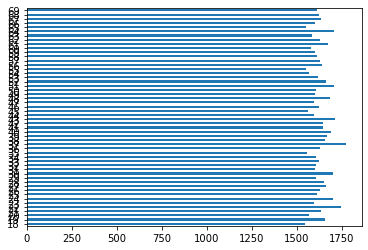

In [15]:
df.age.value_counts().sort_index().plot(kind='barh')

In [20]:
df.head()

,accessed_date,duration_(secs),accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,2017-03-14 17:43:57.172,2533,Chrome,28,Female,CA,Normal,English,261.96,No,0,Credit Card
1,2017-03-14 17:43:57.172,4034,Mozilla Firefox,21,Male,AR,Normal,English,731.94,No,0,Debit Card
2,2017-03-14 17:43:26.135,1525,Mozilla Firefox,20,Male,PL,Normal,English,14.62,No,0,Cash
3,2017-03-14 17:43:26.135,4572,Mozilla Firefox,66,Female,IN,Normal,Spanish,9.575.775,No,0,Credit Card
4,2017-03-14 18:17:09.005,3652,Mozilla Firefox,53,Female,KR,Normal,Spanish,22.368,No,0,Cash


In [21]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [23]:
df['returned'] = le.fit_transform(df['returned'])
df['accessed_Ffom'] = le.fit_transform(df['accessed_Ffom'])
df['country'] = le.fit_transform(df['country'])
df['membership'] = le.fit_transform(df['membership'])
df['language'] = le.fit_transform(df['language'])
df['pay_method'] = le.fit_transform(df['pay_method'])

In [26]:
df['country'].head()

0     4
1     1
2    21
3    14
4    17
Name: country, dtype: int32